In [359]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
#import seaborn as sn
from sklearn.model_selection import train_test_split

from random import seed
seed(1)
seed = 43

import tensorflow as tf
from tensorflow import keras
print("Tensorflow Version: ", tf.__version__)
print("Keras Version: ",keras.__version__)


kaggle = 0 # Kaggle path active = 1

# change your local path here
if kaggle == 1 :
    MNIST_PATH= '../input/digit-recognizer'
else:
    MNIST_PATH= '../Digit_Recognition_with_a_Deep_Neural_Network/data/input/digit-recognizer'



import os
for dirname, _, filenames in os.walk(MNIST_PATH): 
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

Tensorflow Version:  2.3.0
Keras Version:  2.4.0
../Digit_Recognition_with_a_Deep_Neural_Network/data/input/digit-recognizer\keras_reg_160_10_002.sav
../Digit_Recognition_with_a_Deep_Neural_Network/data/input/digit-recognizer\keras_reg_jl_160_10_002.sav
../Digit_Recognition_with_a_Deep_Neural_Network/data/input/digit-recognizer\sample_submission.csv
../Digit_Recognition_with_a_Deep_Neural_Network/data/input/digit-recognizer\test.csv
../Digit_Recognition_with_a_Deep_Neural_Network/data/input/digit-recognizer\train.csv


# Introduction - MNIST Training Competition
Link to the topic: https://www.kaggle.com/c/digit-recognizer/data

This is another Notebook to take a look into annother algorithm. Here I want to give the Deep Neural Network with the Framework Keras a try. As already mentioned in other notebooks, I will skip some explanations about the data set here. Moreover I will use the already discovered knowledge about the data and transform/prepare the data rightaway.

If you are interested in some more clearly analysis of the dataset take a look into my other notebooks about the MNIS-dataset:
- Another MNIST Try: https://www.kaggle.com/skiplik/another-mnist-try
- First NN by Detecting Handwritten Characters: https://www.kaggle.com/skiplik/first-nn-by-detecting-handwritten-characters
...




# Get Data

In [360]:
# Data path and file
#MNIST_PATH= '../input/digit-recognizer'
#MNIST_PATH= '../Another_MNIST_try/data/input/digit-recognizer'
CSV_FILE_TRAIN='train.csv'
CSV_FILE_TEST='test.csv'

def load_mnist_data(minist_path, csv_file):
    csv_path = os.path.join(minist_path, csv_file)
    return pd.read_csv(csv_path)

def load_mnist_data_manuel(minist_path, csv_file):
    csv_path = os.path.join(minist_path, csv_file)
    csv_file = open(csv_path, 'r')
    csv_data = csv_file.readlines()
    csv_file.close()
    return csv_data

def split_train_val(data, val_ratio):
    return 
    

train = load_mnist_data(MNIST_PATH,CSV_FILE_TRAIN)
test = load_mnist_data(MNIST_PATH,CSV_FILE_TEST)

In [361]:
y = train['label'].copy()
X = train.drop(['label'], axis=1)

X_test = test.copy()

## Train / Val Split

In [362]:
print("Shape of the Features: ",X.shape)
print("Shape of the Labels: ", y.shape)

Shape of the Features:  (42000, 784)
Shape of the Labels:  (42000,)


### TK - Label Value Count
Visualizing the label distribution of the full train dataset.

In [363]:
train.value_counts('label')

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
dtype: int64

In [364]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=seed, test_size=0.15
                                                  , stratify=y
                                                 )

Comparing the equally splitted train- and val-sets based on the given label y.

In [365]:
print("Train - Set Distribution")
print(y_train.value_counts() / y_train.value_counts().sum() )
print('--------------------------------------------------------------')
print('--------------------------------------------------------------')
print('--------------------------------------------------------------')
print("Val - Set Distribution")
print(y_val.value_counts() / y_val.value_counts().sum() )


Train - Set Distribution
1    0.111513
7    0.104790
3    0.103585
9    0.099720
2    0.099440
6    0.098515
0    0.098375
4    0.096947
8    0.096751
5    0.090364
Name: label, dtype: float64
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
Val - Set Distribution
1    0.111587
7    0.104762
3    0.103651
9    0.099683
2    0.099524
6    0.098413
0    0.098413
4    0.096984
8    0.096667
5    0.090317
Name: label, dtype: float64


In [366]:
print("X: ", X.shape)
print("X_train: ", X_train.shape)
print("X_val: ", X_val.shape)

print("y_train: ", y_train.shape)
print("y_val: ", y_val.shape)

X:  (42000, 784)
X_train:  (35700, 784)
X_val:  (6300, 784)
y_train:  (35700,)
y_val:  (6300,)


## TK - Free space for coding

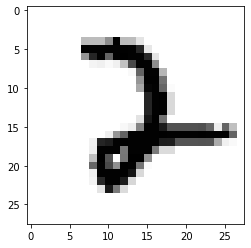

In [367]:
#############################################################

plt.imshow(np.asfarray(X_train[2:3]).reshape(28,28), cmap='Greys')

## Building Transforming Piplines

In [368]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('normalizer', Normalizer())
    #('std_scalar',StandardScaler())
])

In [369]:
X_train_prep = pipeline.fit_transform(X_train)      # fitting the pipeline to the train and transform it
X_val_prep = pipeline.transform(X_val)              # transform val data with this information

# Building a Deep Neural Network based on RandomizedSearch

## Preparing Model Visualization with Tensorboard (not for Kaggle)

In [370]:
root_logdir = "../../tensorboard-logs"

print("Relative root_logdir: ",root_logdir)

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir,run_id)

Relative root_logdir:  ../../tensorboard-logs


In [371]:
run_logdir = get_run_logdir()
print("Current run logdir for Tensorboard: ", run_logdir)

Current run logdir for Tensorboard:  ../../tensorboard-logs\run_2021_08_27-18_05_53


In [372]:
run_logdir

'../../tensorboard-logs\\run_2021_08_27-18_05_53'

### Keras Callbacks for Tensorboard
With Keras there is a way of using Callbacks for the Tensorboard to write log files for the board and visualize the different graphs (loss and val curve)


In [373]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

## Building Model Architecture

### Architecture for Hyperparameter Optimization
- Amount of Layers
- Amount of Neurons
- Learningrate
- Checkpoints !!!!!!!!!!!!!!!!!!!!!
- Early Stopping 

In [374]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[784]):
    model = keras.models.Sequential()                               # base model structure (Sequential API by Keras)

    model.add(keras.layers.InputLayer(input_shape=input_shape))     # input layer

    for layer in range(n_hidden):                                   # add layers as often as defined in constructor 
        model.add(keras.layers.Dense(n_neurons,activation="relu"))  # add layer with given neurons and relu activation function

    model.add(keras.layers.Dense(10, activation="softmax"))                               # add output layer 

    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)   # define optimizer (especially the larning rate for hyperparameter optimization)

    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])                  # make it ready

    return model


In [375]:
# Using keras wrapper as hull 
keras_reg = keras.wrappers.scikit_learn.KerasClassifier(build_model)

### Hyperparameter Space

In [376]:
from scipy.stats import reciprocal


# Hyperparameter set
param_dist= {
            "n_neurons": range(20, 500, 20)
            ,"n_hidden": range(10, 100, 10)
            ,"learning_rate": [1e-3, 2e-3]
    }


param_dist_lr= {
        "n_neurons": [10, 50, 100, 150, 300]                   #[10]     153 sekunden                                  #  [10]  #133 sekunden          ##[10,50,150,300]                     #range(10,300,10) 
        ,"n_hidden": [10, 50, 100, 150]                  #[10]     verlust höher und genauigkeit geringer        #  [10]  #                           ##[10,40,80]                          #range(10, 100, 10)
        ,"learning_rate": [1e-3, 3e-4, 3e-2]               #[1e-3]                                                 #  [1e-2] #                 ##[1e-3, 1e-2]    # [np.exp(np.log(10**6)/1000)]   #### exp(log(10**6)/500)
                                                                        # np.reciprocal(3e-4, 3e-2)
}



param_dist_bestrun_1 = {
        "n_neurons": [150]
        ,"n_hidden": [30]
        ,"learning_rate": [2e-3]  
}


param_dist_bestrun_2 = {
        "n_neurons": [100]
        ,"n_hidden": [10]
        ,"learning_rate": [2e-3]  
}

## TK - Model Checkpoints

In [377]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_rans_model.h5", save_best_only=True, save_weights_only=False)

## Model Training

### Randomized Search

In [378]:
# Finding best hyperparameters with Randomized search
from sklearn.model_selection import RandomizedSearchCV

ran_ker_reg = RandomizedSearchCV(keras_reg, param_dist_lr, n_iter=10, cv=3, random_state=seed, return_train_score=True, n_jobs=5)
history_ker_reg = ran_ker_reg.fit(X_train_prep, y_train, epochs=100, validation_data=(X_val_prep, y_val), callbacks=[checkpoint_cb, keras.callbacks.EarlyStopping(patience=5), tensorboard_cb])

D:\anaconda3\envs\wingpuflake_keras\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Epoch 1/100
744/744 [==============================] - 1s 2ms/step - loss: 2.3023 - accuracy: 0.1192 - val_loss: 2.3020 - val_accuracy: 0.1243
Epoch 2/100
744/744 [==============================] - 1s 767us/step - loss: 2.3016 - accuracy: 0.1180 - val_loss: 2.3011 - val_accuracy: 0.1173
Epoch 3/100
744/744 [==============================] - 1s 790us/step - loss: 2.3007 - accuracy: 0.1142 - val_loss: 2.3002 - val_accuracy: 0.1132
Epoch 4/100
744/744 [==============================] - 1s 750us/step - loss: 2.2997 - accuracy: 0.1122 - val_loss: 2.2992 - val_accuracy: 0.1067
Epoch 5/100
744/744 [==============================] - 1s 774us/step - loss: 2.2986 - accuracy: 0.1063 - val_loss: 2.2980 - val_accuracy: 0.1057
Epoch 6/100
744/744 [==============================] - 1s 773us/step - loss: 2.2973 - accuracy: 0.1002 - val_loss: 2.2966 - val_accuracy: 0.0984
Epoch 7/100
744/744 [==============================] - 1s 808us/step - loss: 2.2958 - accuracy: 0.0961 - val_loss: 2.2950 - val_accu

In [379]:
history_ker_reg.best_params_

{'n_neurons': 10, 'n_hidden': 10, 'learning_rate': 0.001}

In [380]:
history_ker_reg

RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000002B0E2D38370>,
                   param_distributions={'learning_rate': [0.001],
                                        'n_hidden': [10], 'n_neurons': [10]},
                   random_state=43, return_train_score=True)

### TK - Model Training with Full Dataset and Discovered Hyperparameters

In [381]:
# Creating wrapped regression model with our function.      BACKUP: {'n_neurons': 50, 'n_hidden': 10, 'learning_rate': 0.001}
keras_reg_model = keras_reg.build_fn(n_neurons= 10, n_hidden= 10, learning_rate=0.001)

In [382]:
keras_reg_model.summary()

Model: "sequential_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1829 (Dense)           (None, 10)                7850      
_________________________________________________________________
dense_1830 (Dense)           (None, 10)                110       
_________________________________________________________________
dense_1831 (Dense)           (None, 10)                110       
_________________________________________________________________
dense_1832 (Dense)           (None, 10)                110       
_________________________________________________________________
dense_1833 (Dense)           (None, 10)                110       
_________________________________________________________________
dense_1834 (Dense)           (None, 10)                110       
_________________________________________________________________
dense_1835 (Dense)           (None, 10)              

In [383]:
# creating a new log dir for tensorboard
tensorboard_cb_f = keras.callbacks.TensorBoard(get_run_logdir())
checkpoint_cb_f = keras.callbacks.ModelCheckpoint("my_keras_reg_model.h5", save_best_only=False, save_weights_only=False)

In [384]:
# preparing data based on our beautifull trained data pipeline
X_prep_all = pipeline.transform(X)

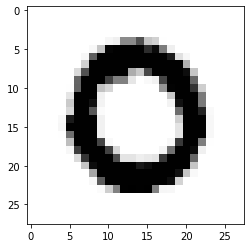

In [385]:
# Test after pipeline use
plt.imshow(X_prep_all[1].reshape(28,28), cmap='Greys')

In [386]:
# Train the model again pleeeeease with all you got .... especially the new transformed data matrix X 
keras_reg_model.fit(X_prep_all, y, epochs=100, callbacks=[tensorboard_cb_f, checkpoint_cb_f])

Epoch 1/100
1313/1313 [==============================] - 1s 1ms/step - loss: 2.3021 - accuracy: 0.1116
Epoch 2/100
1313/1313 [==============================] - 1s 667us/step - loss: 2.3013 - accuracy: 0.1115
Epoch 3/100
1313/1313 [==============================] - 1s 643us/step - loss: 2.3007 - accuracy: 0.1115
Epoch 4/100
1313/1313 [==============================] - 1s 630us/step - loss: 2.3001 - accuracy: 0.1115
Epoch 5/100
1313/1313 [==============================] - 1s 633us/step - loss: 2.2995 - accuracy: 0.1115
Epoch 6/100
1313/1313 [==============================] - 1s 636us/step - loss: 2.2989 - accuracy: 0.1115
Epoch 7/100
1313/1313 [==============================] - 1s 621us/step - loss: 2.2981 - accuracy: 0.1115
Epoch 8/100
1313/1313 [==============================] - 1s 656us/step - loss: 2.2972 - accuracy: 0.1115
Epoch 9/100
1313/1313 [==============================] - 1s 634us/step - loss: 2.2962 - accuracy: 0.1115
Epoch 10/100
1313/1313 [==============================] -

# Image Prediction of Unknown Data (Test Data)

## Peparing Test Data

In [387]:
X_test_prep = pipeline.transform(X_test)

In [388]:
X_test_prep

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Creating Competition File

In [389]:
mnist_competition_file = pd.DataFrame(columns=['ImageId','Label'])

## Prediction of Testdata

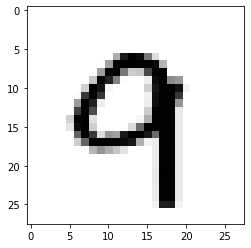

In [393]:
plt.imshow(X_test_prep[43].reshape(28,28), cmap='Greys')

In [394]:
print("Propability of all lables for given pixels: ", keras_reg_model.predict(X_test_prep[43].reshape(1,-1)))

Propability of all lables for given pixels:  [[4.4975845e-06 4.2070023e-09 1.7020870e-04 1.0725735e-02 3.9906695e-01
  2.7450286e-03 2.2626680e-03 2.1788647e-02 1.0249803e-02 5.5298644e-01]]


In [397]:
print("Predicted Digit: ",np.argmax(keras_reg_model.predict(X_test_prep[43].reshape(1,-1))))

Predicted Digit:  9


In [398]:
i = 1
for row in X_test_prep:
    index = i
    predicted_label = np.argmax(keras_reg_model.predict(row.reshape(1,-1)))

    mnist_competition_file = mnist_competition_file.append({'ImageId': index, 'Label': predicted_label}, ignore_index = True )
    i = i + 1
    pass

In [399]:
mnist_competition_file

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
28105,27996,9
28106,27997,7
28107,27998,3
28108,27999,9


In [400]:
mnist_competition_file.ImageId = mnist_competition_file.ImageId.astype(int)
mnist_competition_file.Label = mnist_competition_file.Label.astype(int)

In [401]:
mnist_competition_file.to_csv('mnist_submission.csv', index=False)